In [1]:
import pandas as pd
import spacy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2021-10-04 21:21:37.022930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-04 21:21:37.022961: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [54]:
np.random.seed(123)
sns.set()

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
df.crawler.unique()

array(['Medical Xpress', 'The Bottom Line', 'Smithsonian Magazine',
       'CMAJ News', 'Medical News Today', 'News Medical', 'RD World',
       'Live Science', 'Futurity', 'Health Day', 'Nature',
       'The Scientist', 'MIT News', 'Science Alert', 'IEEE Spectrum',
       'SCI News', 'Science News', 'Broad Institute', 'World Pharma News',
       'Institut Pasteur', 'Research Live', 'Wyss Institute',
       'Tech News World'], dtype=object)

In [5]:
df.crawler.value_counts().keys().values

array(['Medical Xpress', 'News Medical', 'Health Day', 'Futurity',
       'MIT News', 'Science Alert', 'Medical News Today', 'RD World',
       'Nature', 'Science News', 'Live Science', 'The Scientist',
       'IEEE Spectrum', 'World Pharma News', 'SCI News',
       'Tech News World', 'The Bottom Line', 'Institut Pasteur',
       'Broad Institute', 'Smithsonian Magazine', 'CMAJ News',
       'Research Live', 'Wyss Institute'], dtype=object)

## Análise preliminar - tema de cada crawler

In [55]:
for crawler in df.crawler.value_counts().keys().values:
  print(crawler, end='\n')
  base_samples = 20
  crawler_size = df[df.crawler == crawler].shape[0]
  num_samples = min(base_samples, crawler_size)
  sample = df[df.crawler == crawler].sample(num_samples)
  print(sample.title.values, end='\n==============\n')
  print(sample.url.values, end='\n**************\n')

Medical Xpress
['Has the billion dollar crusade to eradicate polio come to an end'
 "Florida virus cases soar, hospitals near last summer's peak"
 'How to protect your kids from RSV'
 'Strong opposition from food lobby to Transport for London advertising'
 'Arkansas reports new record for COVID-19 hospitalizations'
 'Crucial new molecular mechanisms and biomarkers in ovarian cancer'
 'A more complete molecular picture of lung squamous cell carcinoma comes into view'
 'New report reveals hopes and resilience of older adults through COVID'
 'Do family members understand the end-of-life wishes of patients on chronic dialysis'
 'Research shows that exposure to sexualised images on Instagram leads to greater body dissatisfaction'
 'Exploring the impact of blood clots in the veins during renal cell carcinoma surgery'
 'Differences in rapidly processing sensory feedback among people with autism spectrum disorder'
 'Avatars may help elicit embarrassing information'
 'Struggling to learn a new 

## Distribuição da contagem de palavras e tamanho do texto

* Tokenizando textos e títulos e adicionando colunas para contagem de palavras e tamanho do text (utilizamos para a contagem de palavras tokens excluindo stopwords e pontuações)

In [51]:
nlp = spacy.load('en_core_web_sm')

In [12]:
def tokenize_column(column, df):
  tokens_no_s_p = []
  tokens_no_s = []
  tokens_no_p = []
  tokens = []

  for doc in nlp.pipe(df[column].values, batch_size=50, n_process=4):
      if doc.is_parsed:
          tokens_no_s_p.append([token.text for token in doc if not token.is_stop and not token.is_punct])
          tokens_no_s.append([token.text for token in doc if not token.is_stop])
          tokens_no_p.append([token.text for token in doc if not token.is_punct])
          tokens.append([token.text for token in doc])     
      else:
          # We want to make sure that the lists of parsed results have the
          # same number of entries of the original Dataframe, so add some blanks in case the parse fails
          tokens_no_s_p.append(None)
          tokens_no_s.append(None)
          tokens_no_p.append(None)
          tokens.append(None)

  df[column + '_tokens_no_s_p'] = tokens_no_s_p
  df[column + '_tokens_no_s'] = tokens_no_s
  df[column + '_tokens_no_p'] = tokens_no_p
  df[column + '_tokens'] = tokens

In [17]:
tokenize_column('title', df)
tokenize_column('text', df)

df['title_len'] = df.title.apply(lambda x: len(x))
df['text_len'] = df.text.apply(lambda x: len(x))

df['title_wc'] = df.title_tokens_no_s_p.apply(lambda x: len(x))
df['text_wc'] = df.text_tokens_no_s_p.apply(lambda x: len(x))

/tmp/ipykernel_650920/1584785469.py:8: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if doc.is_parsed:


In [30]:
df.crawler.value_counts().keys().values

array(['Medical Xpress', 'News Medical', 'Health Day', 'Futurity',
       'MIT News', 'Science Alert', 'Medical News Today', 'RD World',
       'Nature', 'Science News', 'Live Science', 'The Scientist',
       'IEEE Spectrum', 'World Pharma News', 'SCI News',
       'Tech News World', 'The Bottom Line', 'Institut Pasteur',
       'Broad Institute', 'Smithsonian Magazine', 'CMAJ News',
       'Research Live', 'Wyss Institute'], dtype=object)

## Distribuição da contagem de palavras/tamanho do texto por crawler
* Seguindo ordem decrescente de número de entradas por crawler (crawlers mais presentes no topo)

## `text`

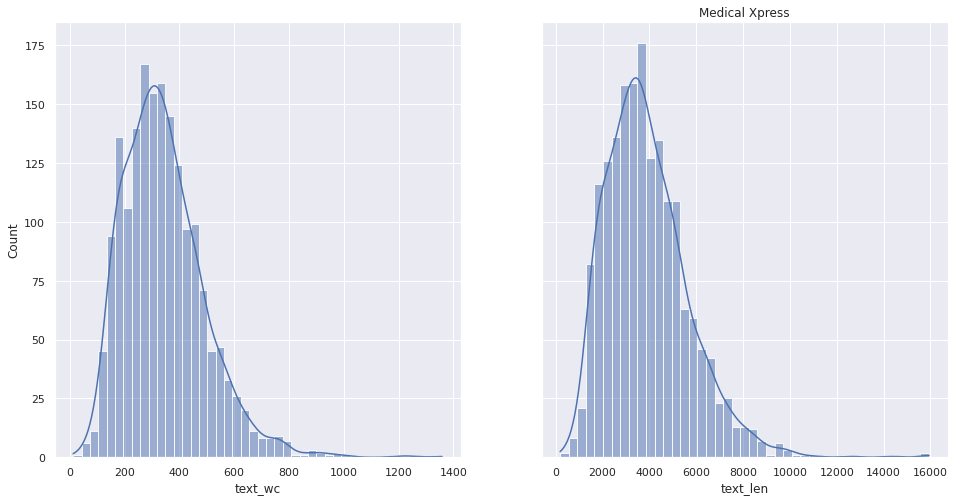

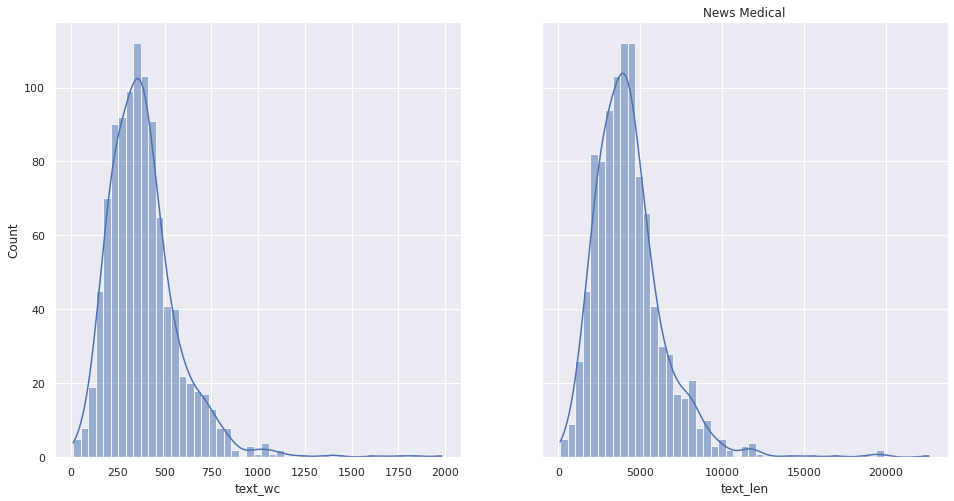

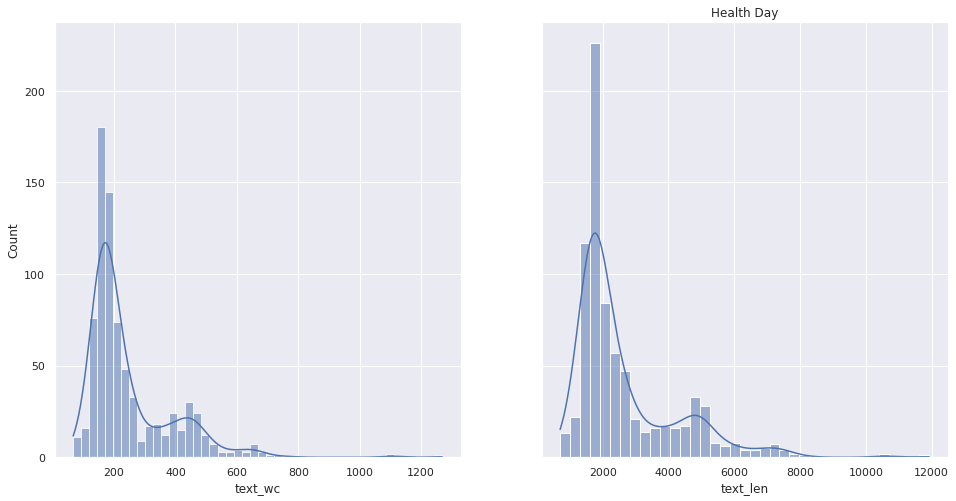

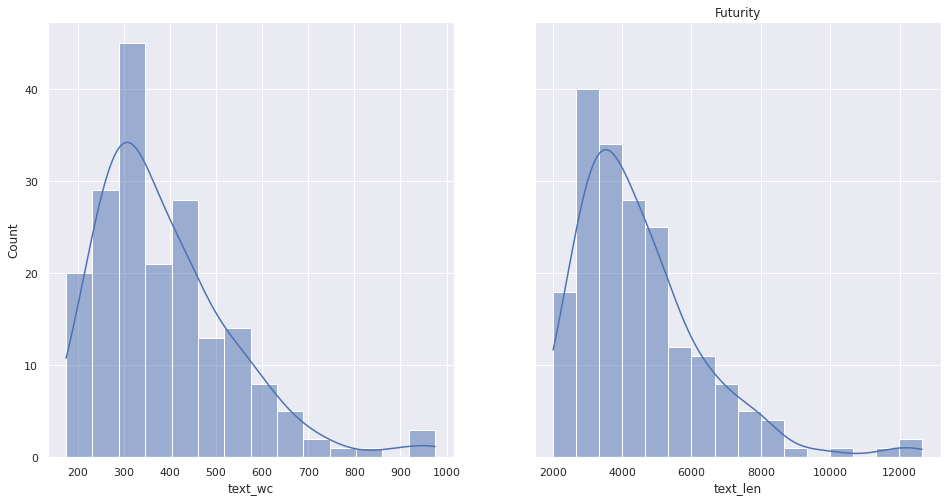

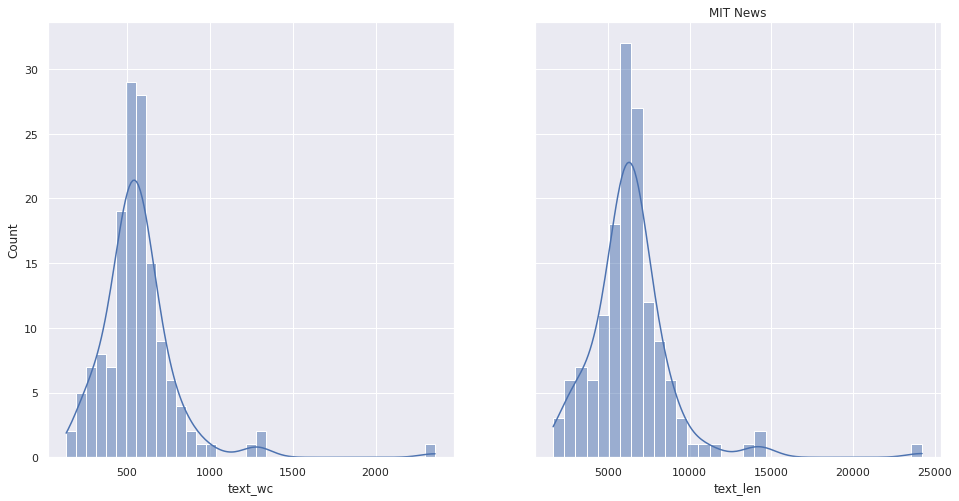

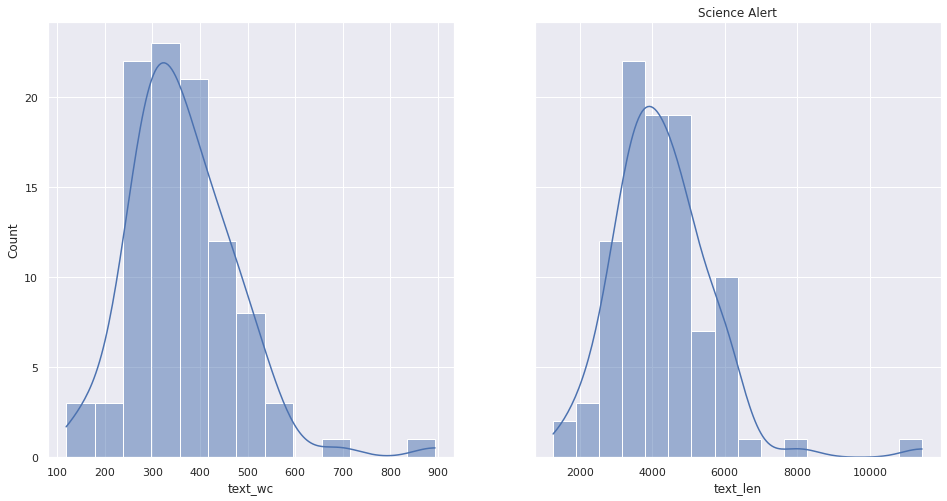

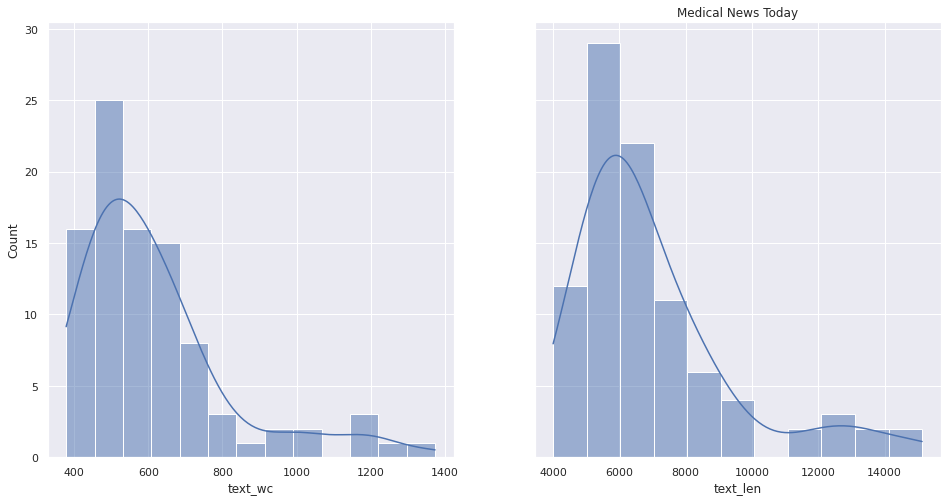

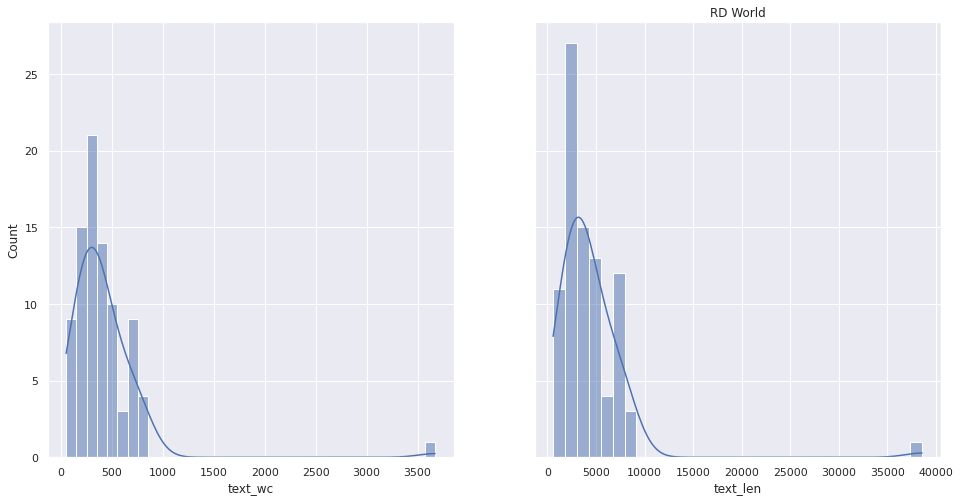

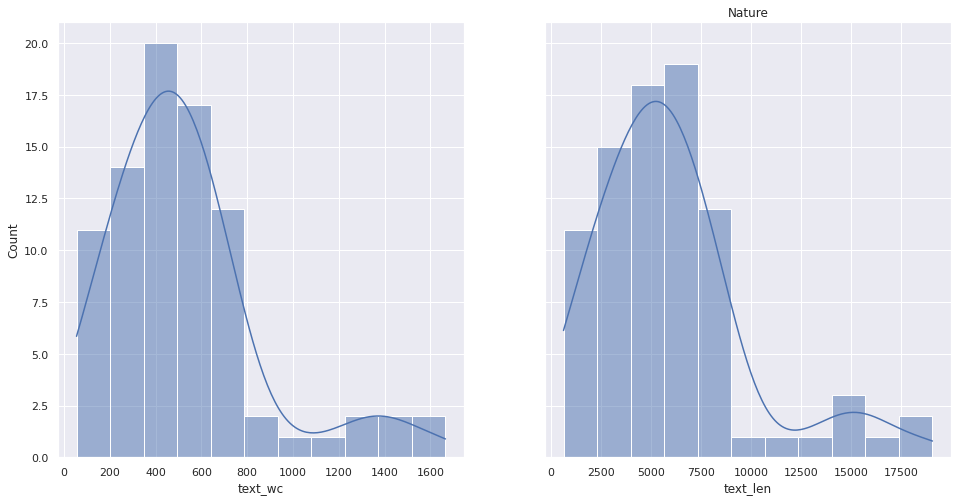

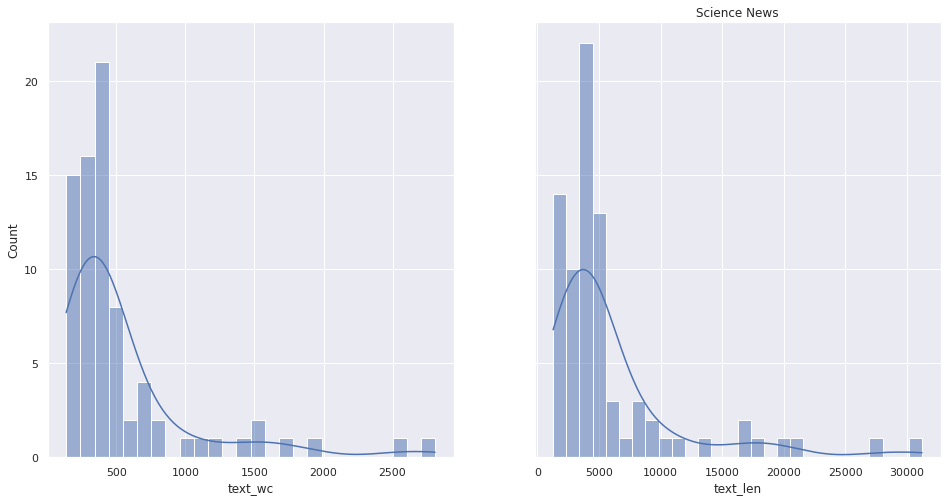

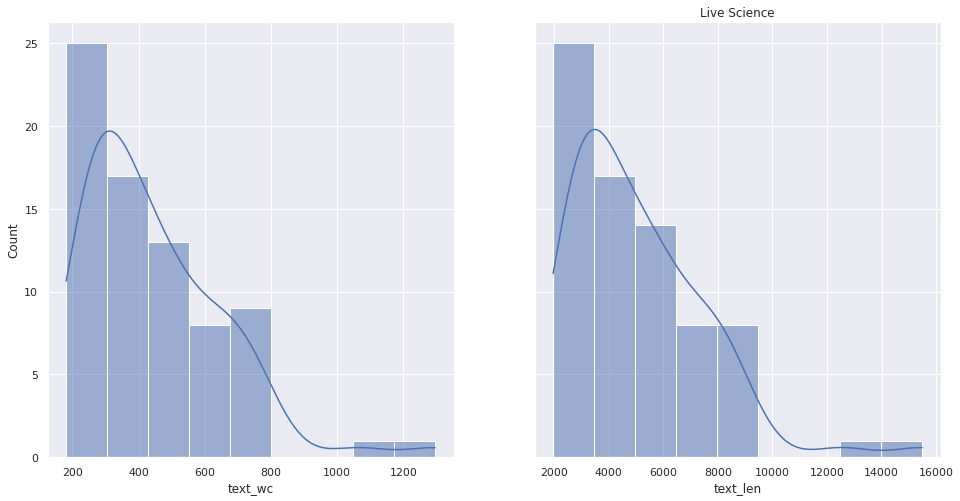

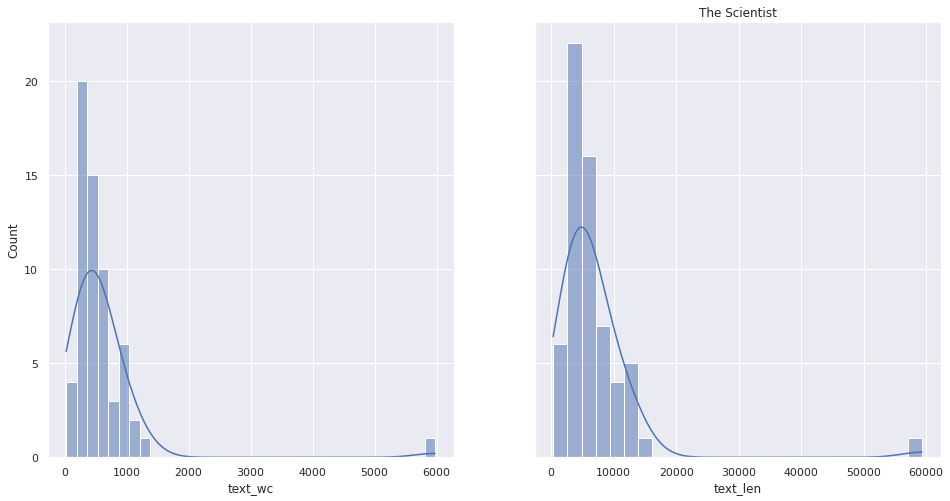

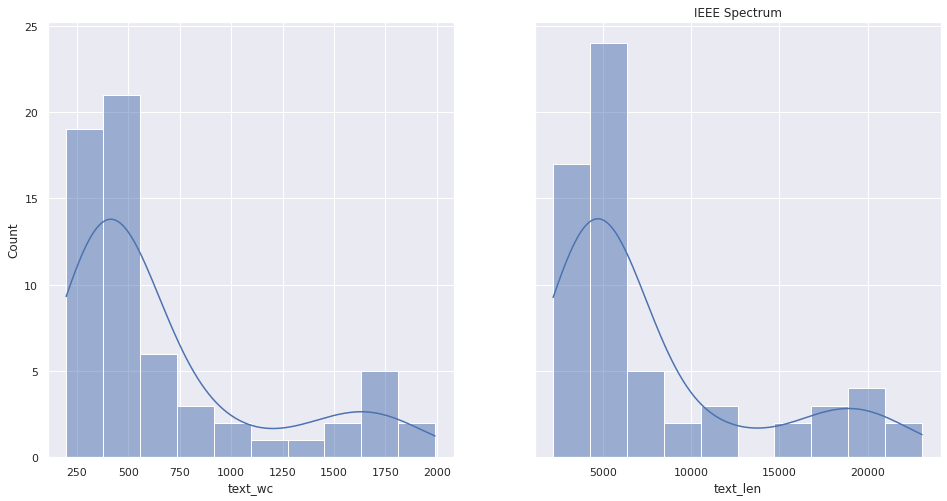

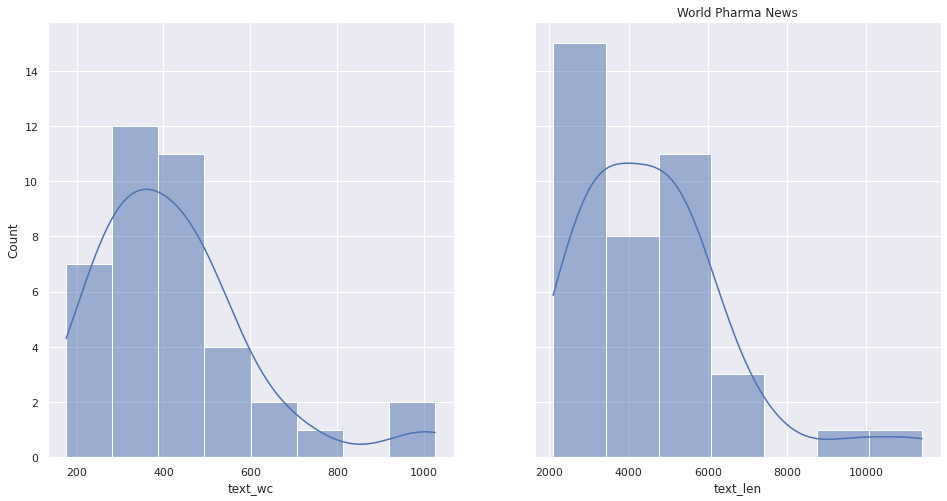

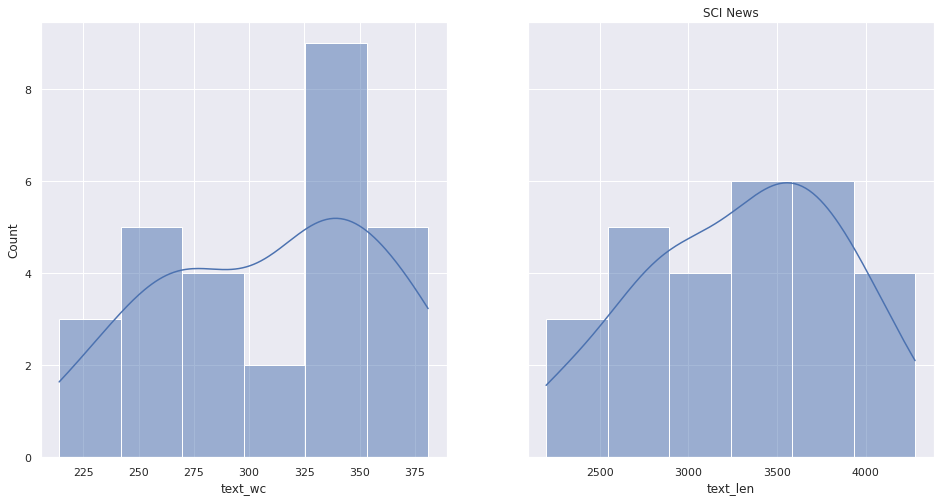

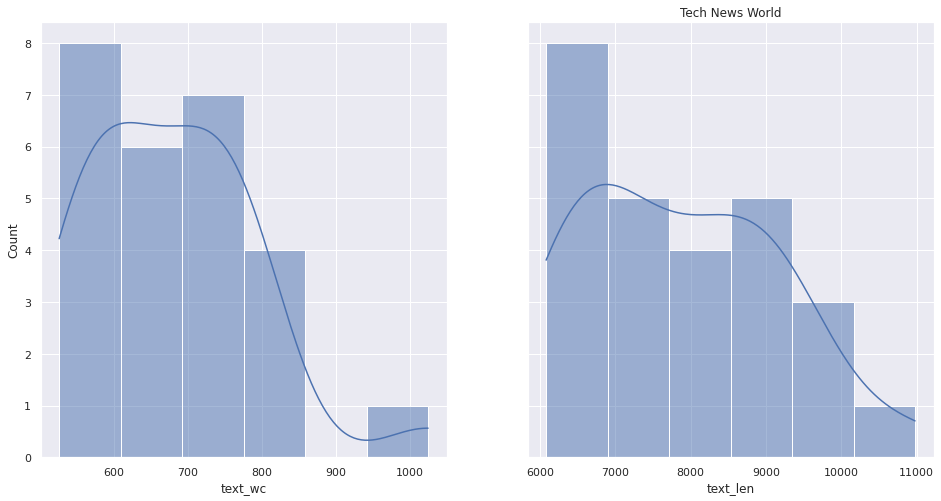

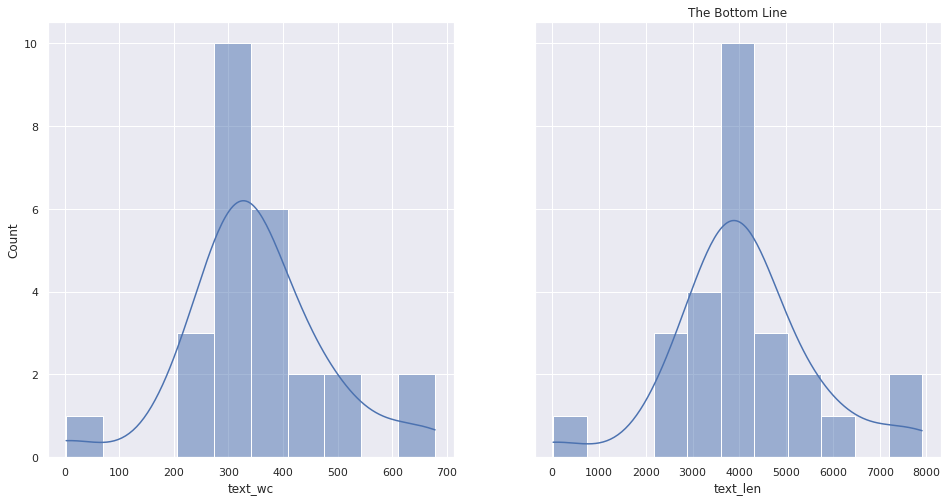

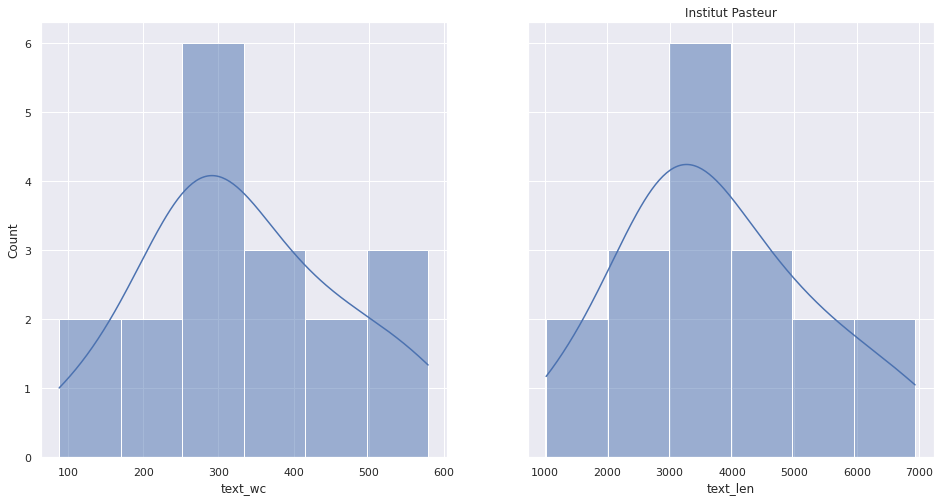

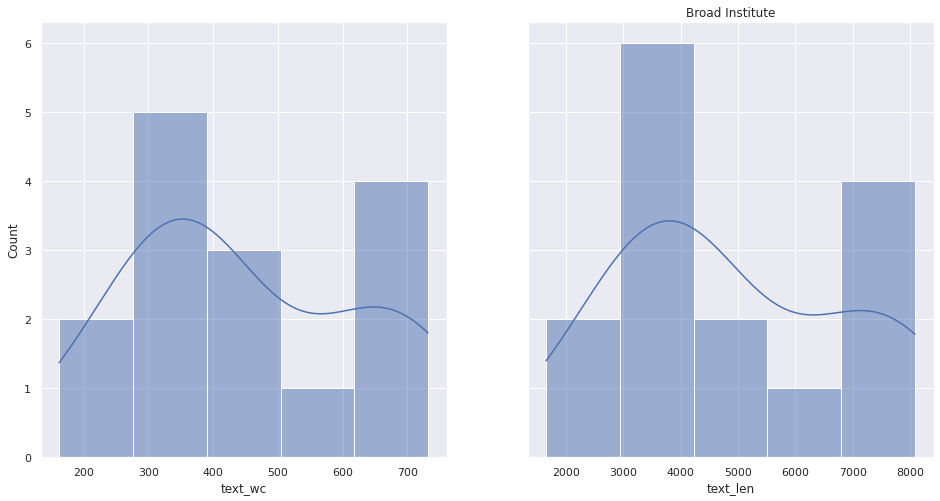

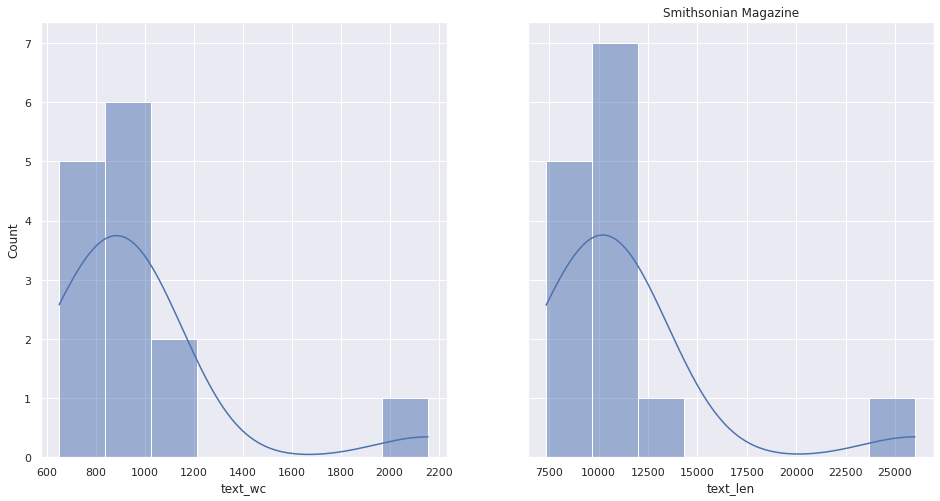

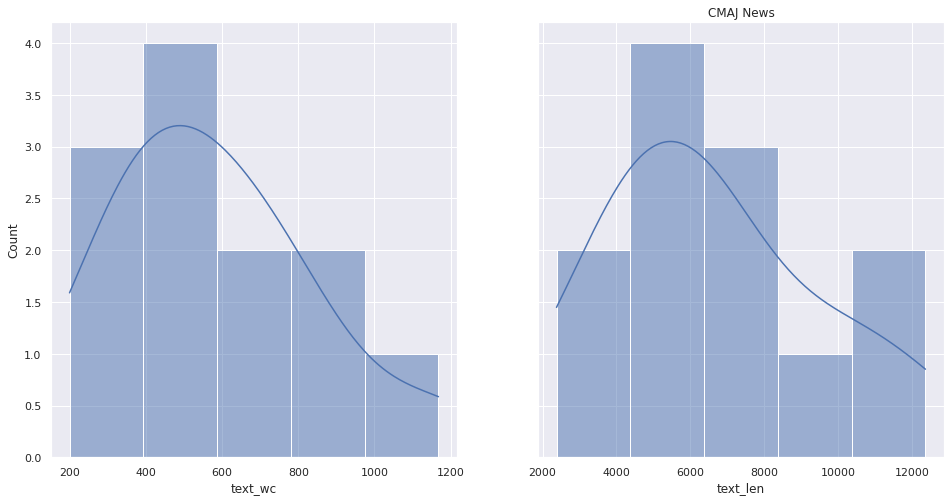

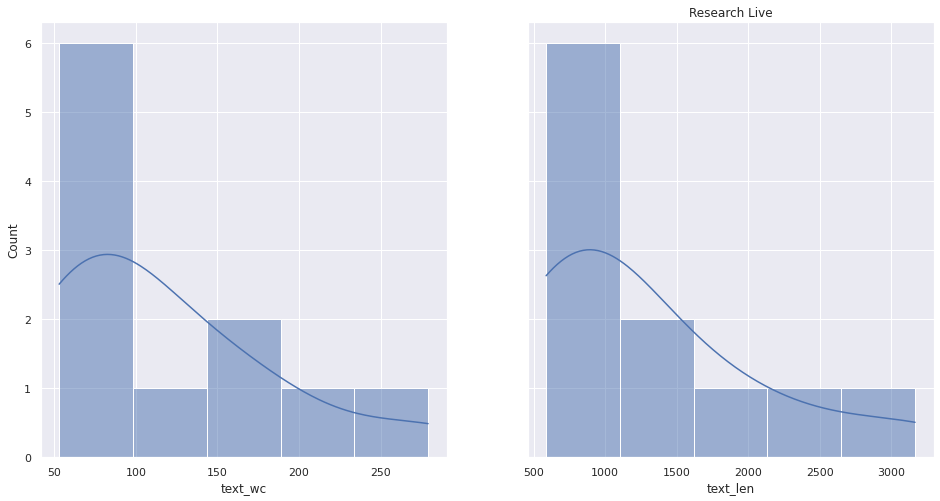

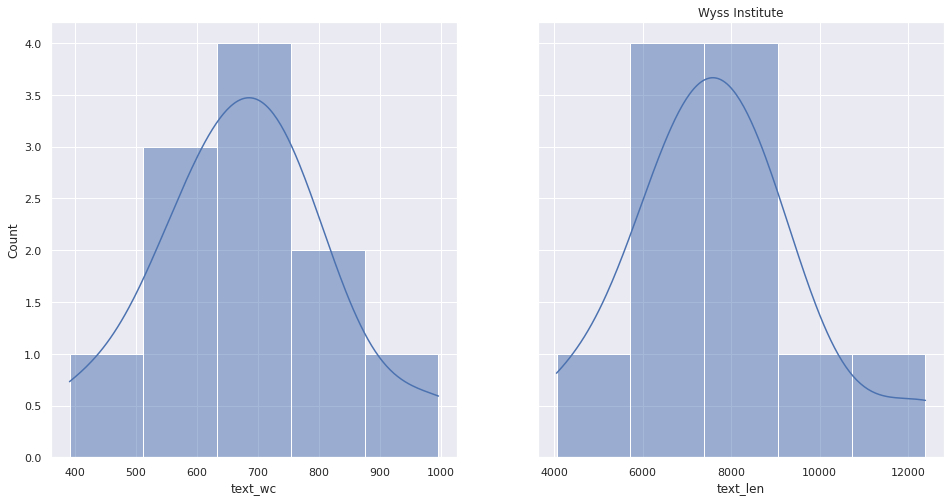

In [50]:
for crawler in df.crawler.value_counts().keys().values:
  fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,8))
  sns.histplot(df[df.crawler == crawler].text_wc, kde=True, label=crawler, ax=axes[0])
  sns.histplot(df[df.crawler == crawler].text_len, kde=True, label=crawler, ax=axes[1])
  plt.title(crawler)
  plt.show(fig)

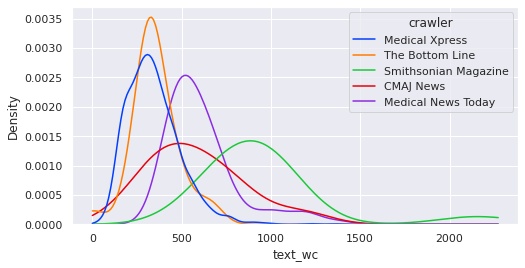

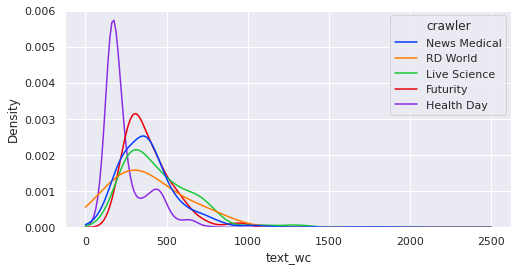

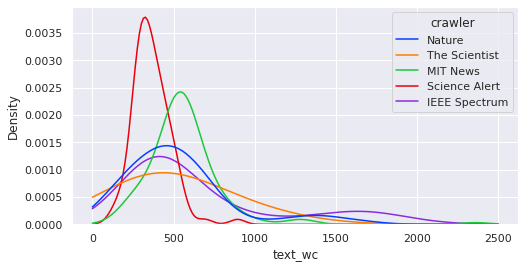

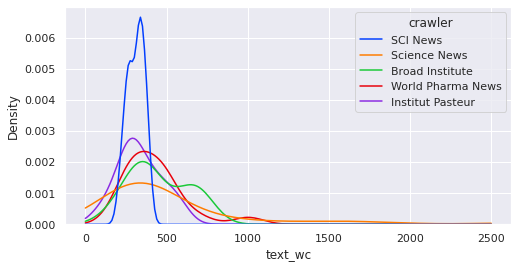

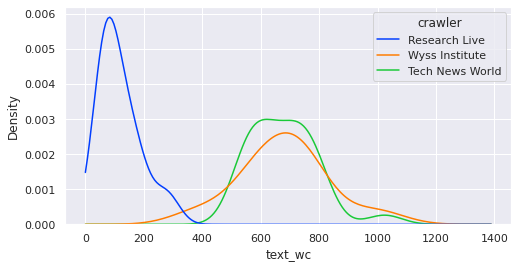

In [125]:
crawlers = df.crawler.unique()
for i in range(0, len(crawlers), 5):
  fig = plt.figure(figsize=(8,4))
  start = i
  end = min(i+5, len(crawlers))
  sns.kdeplot(data=df[df.crawler.isin(crawlers[start:end])], x='text_wc', hue='crawler', clip=(0, 2500), palette="bright", common_norm=False, common_grid=True)
  plt.show()

## `title`

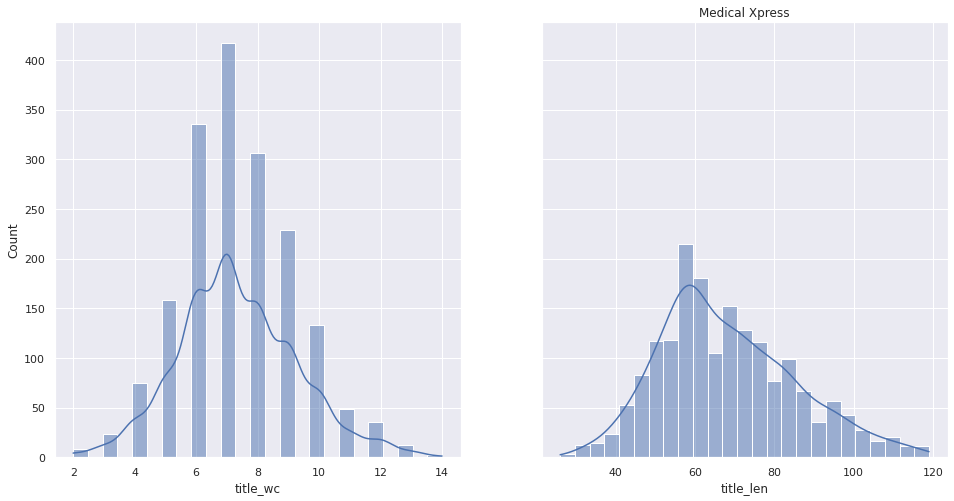

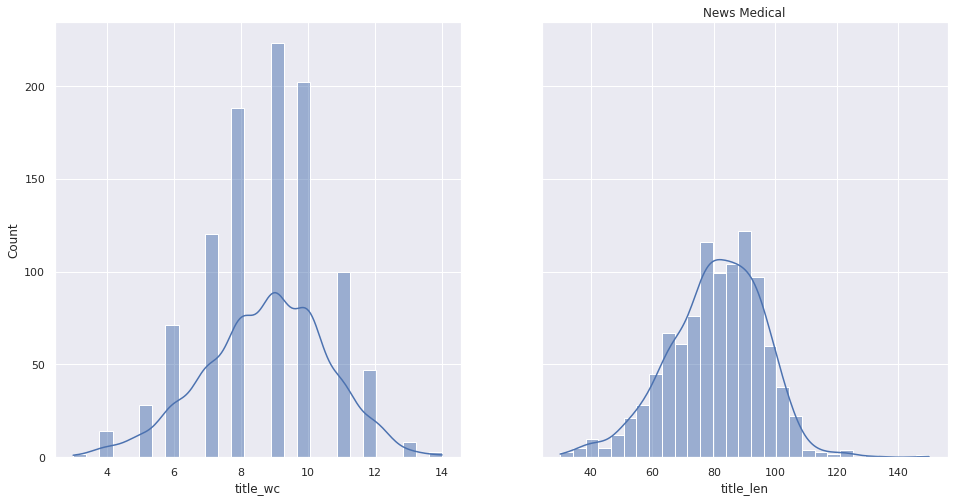

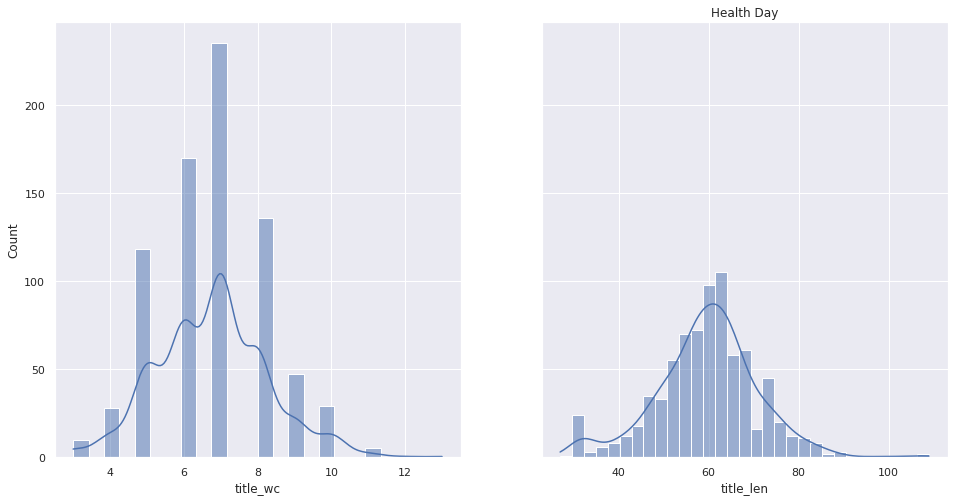

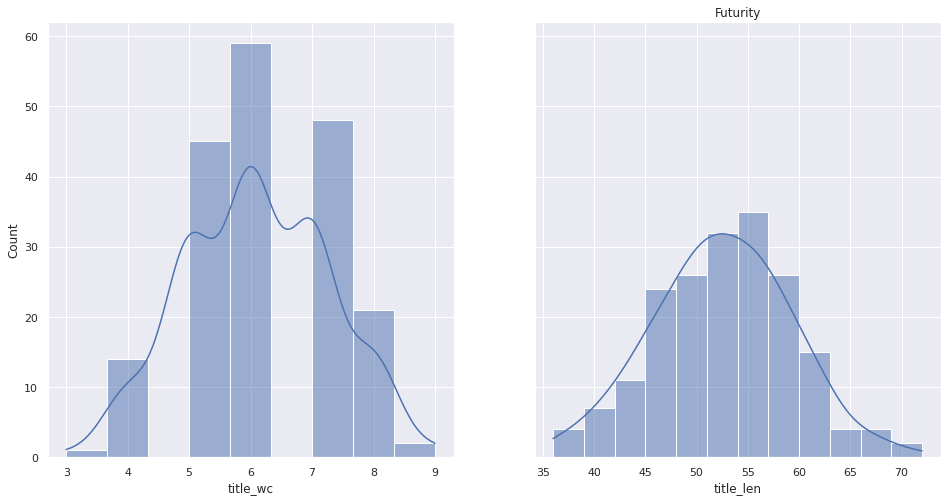

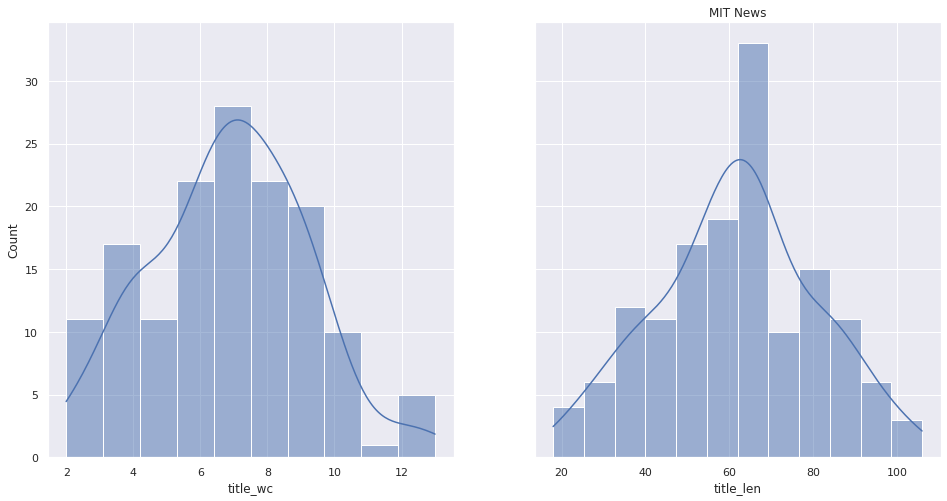

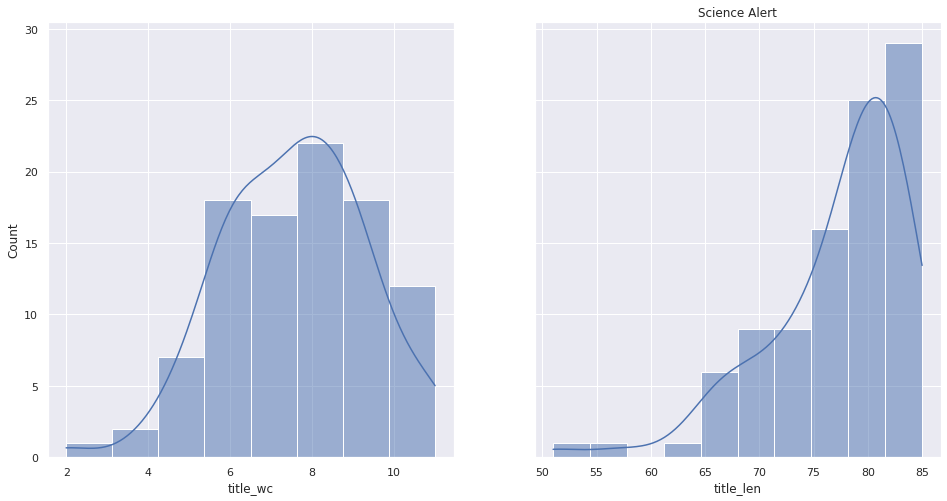

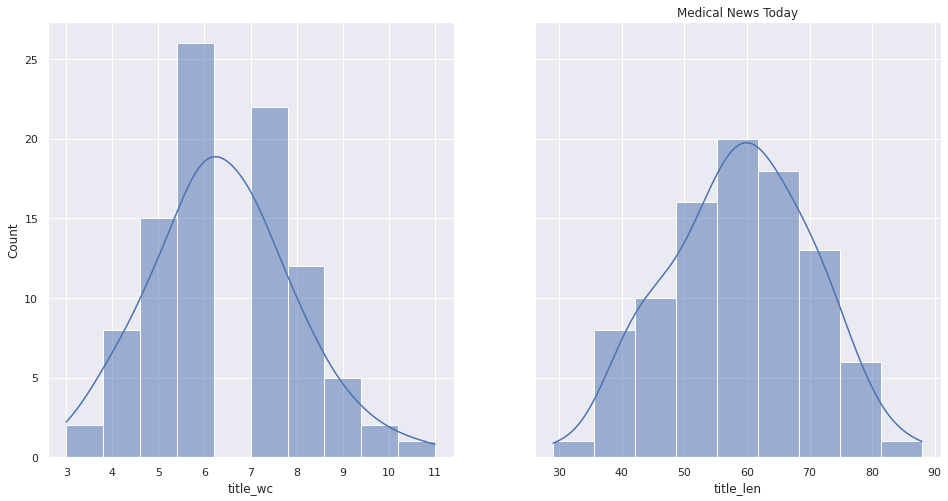

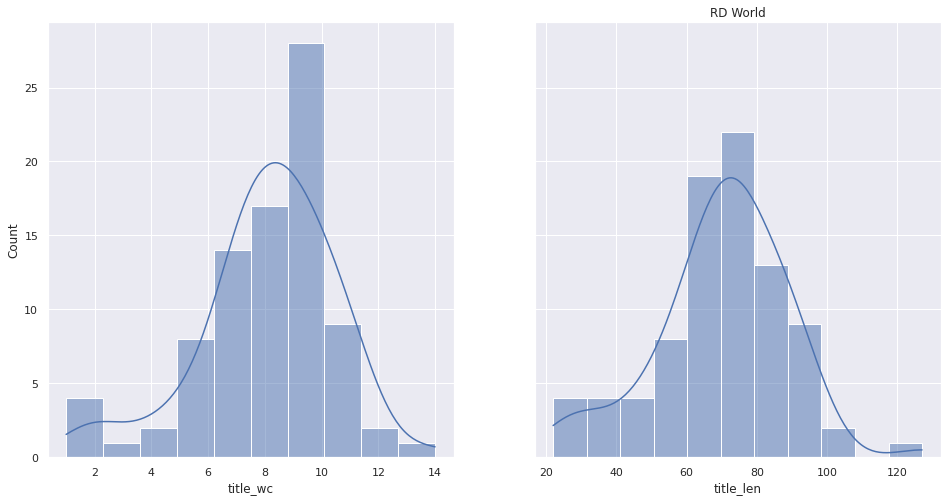

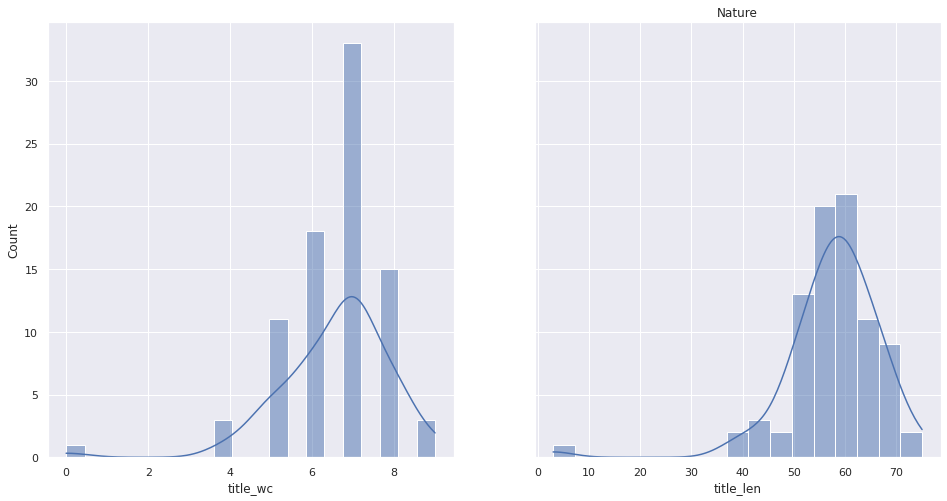

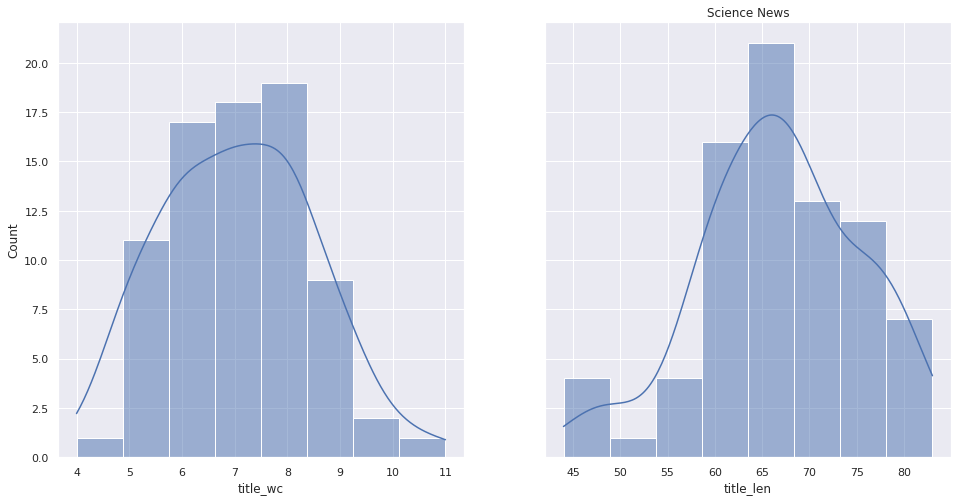

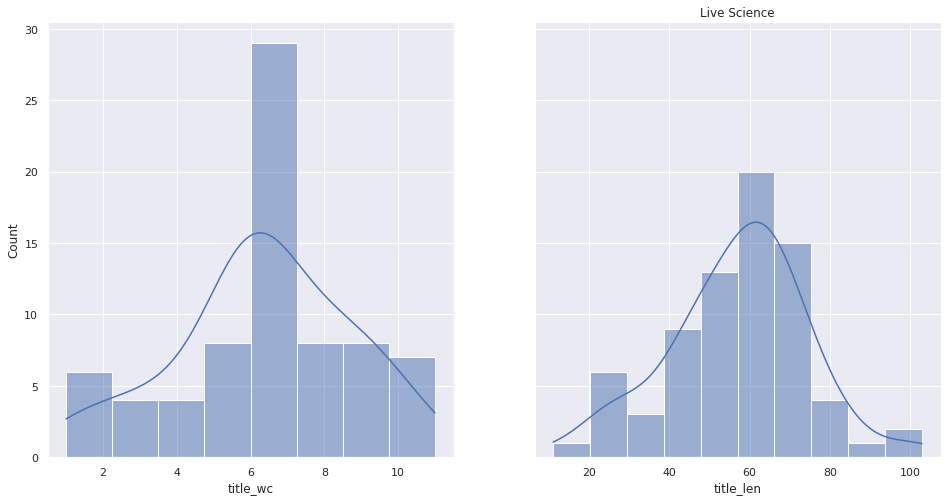

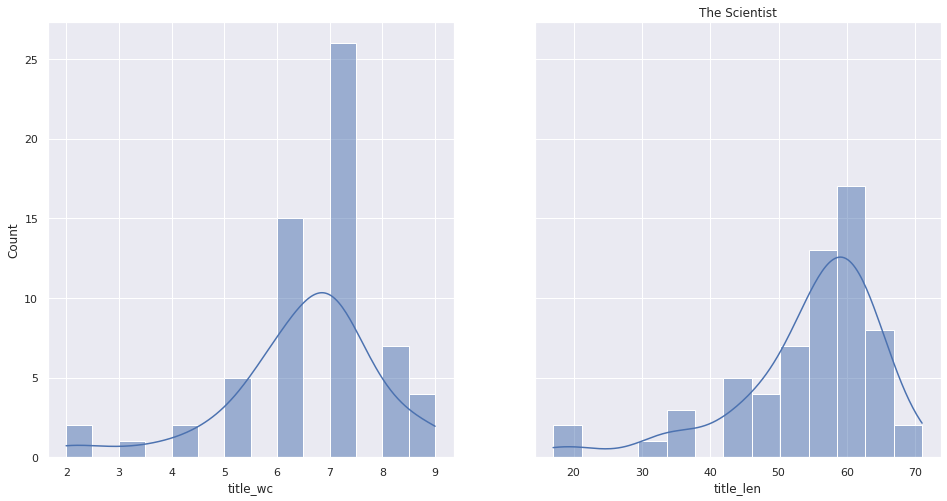

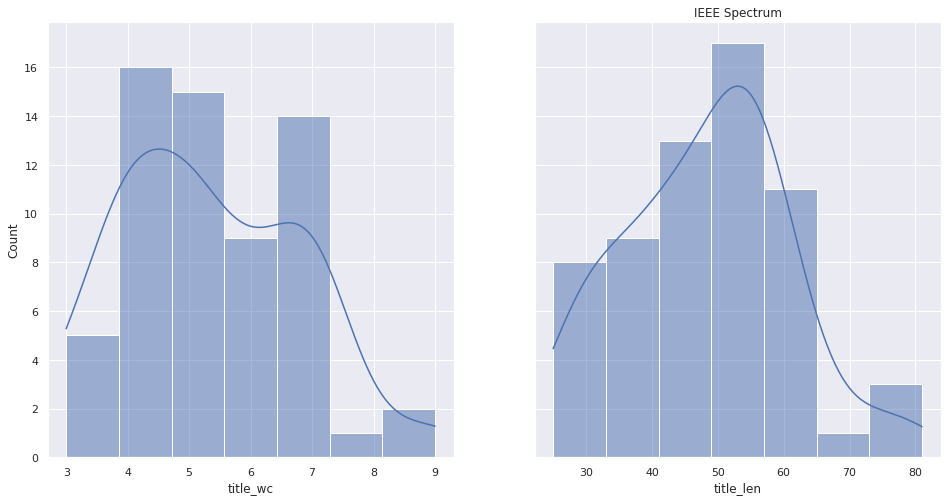

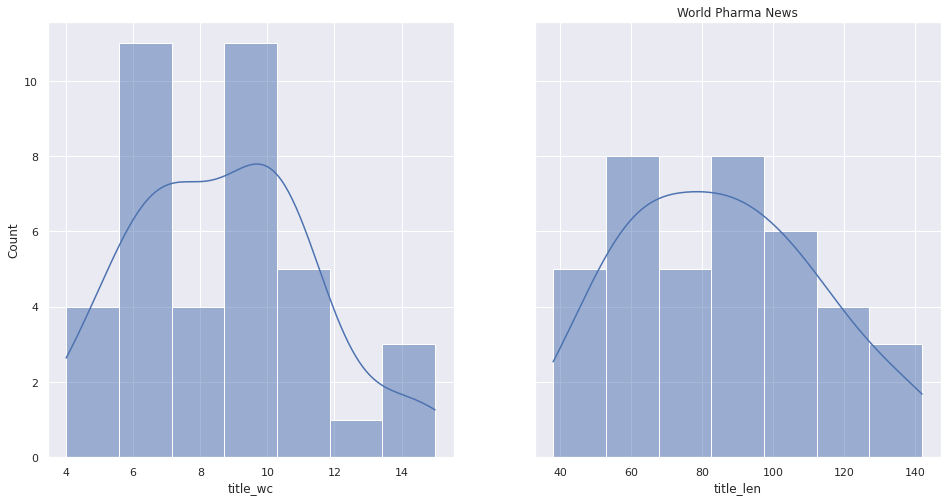

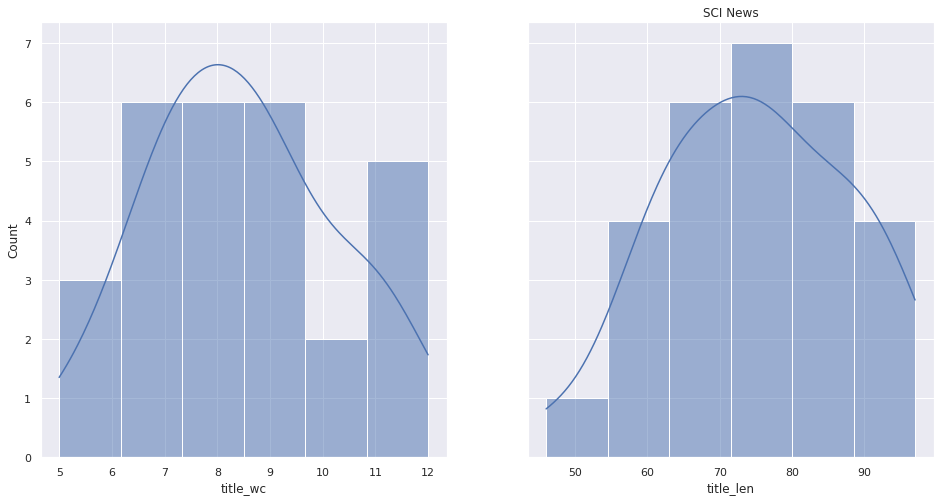

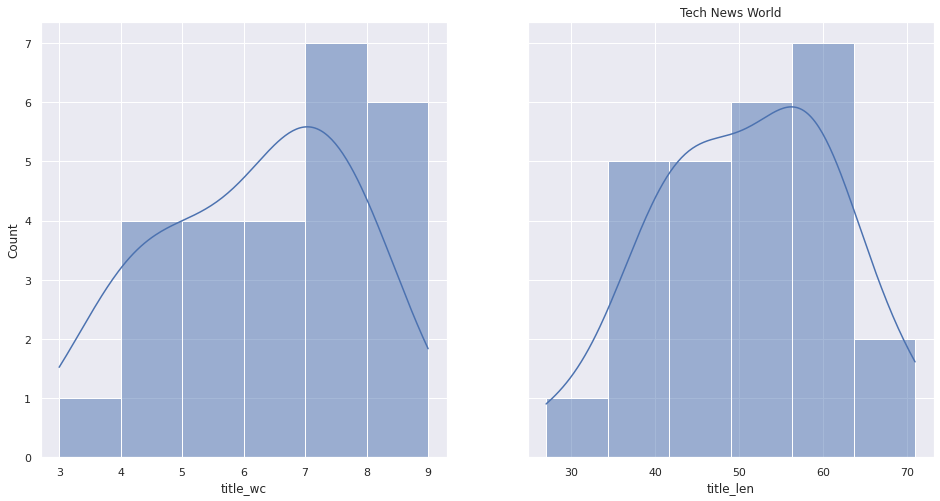

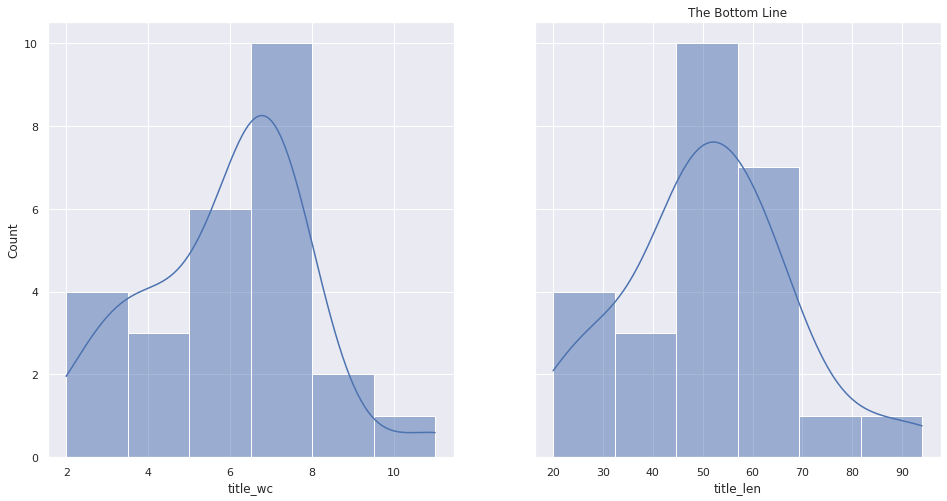

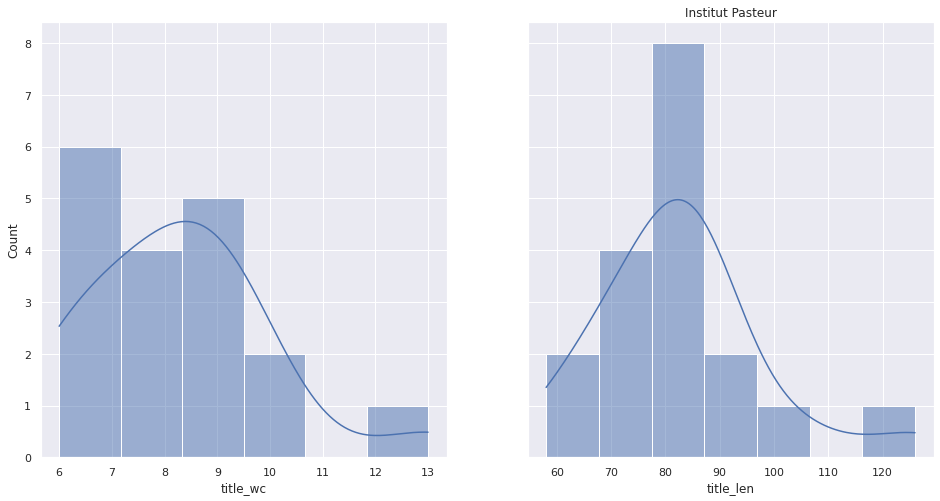

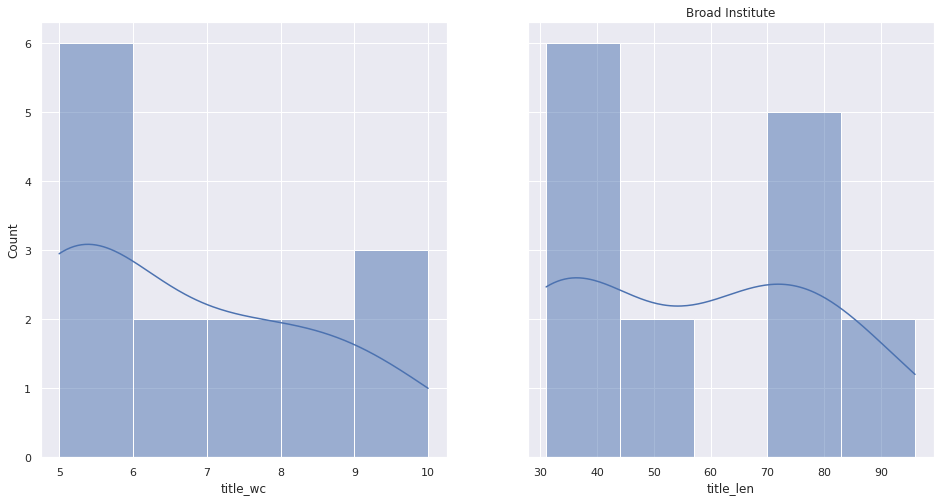

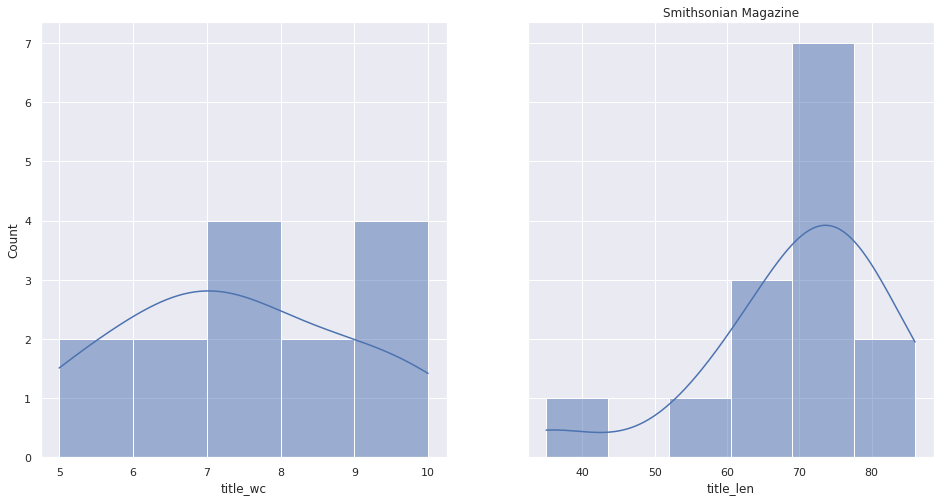

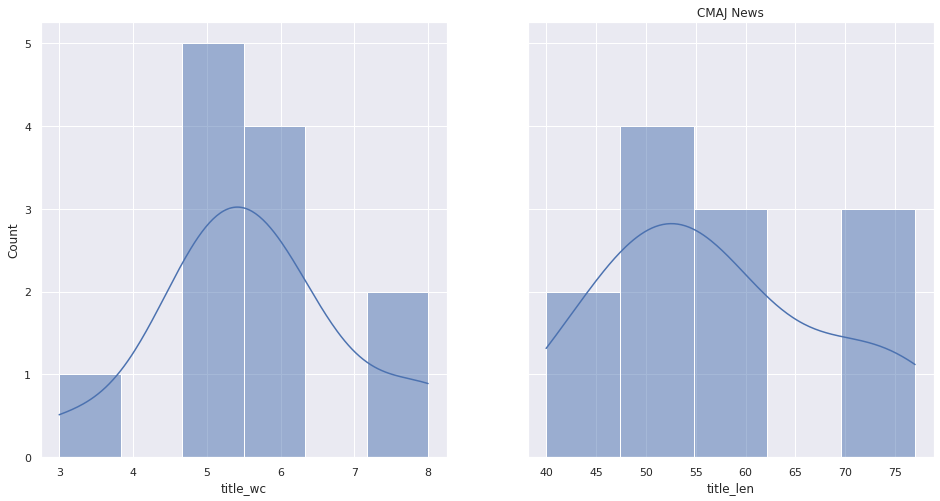

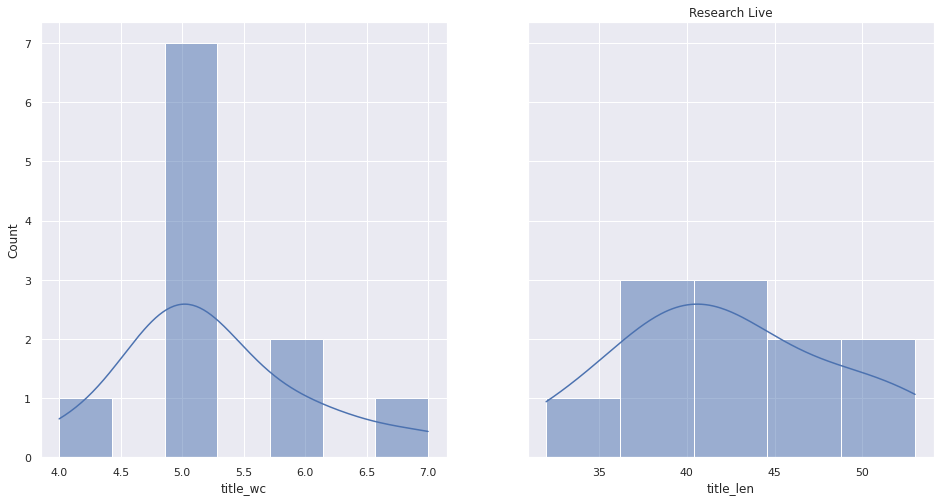

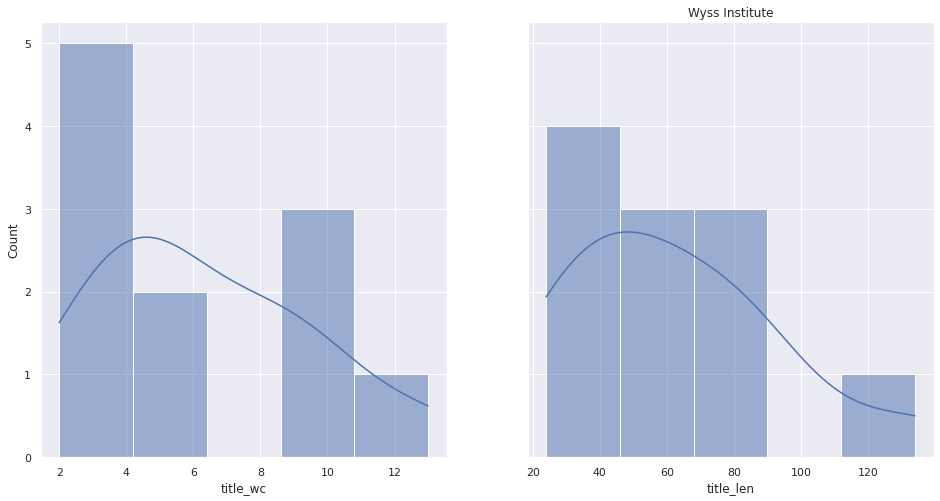

In [53]:
for crawler in df.crawler.value_counts().keys().values:
  fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,8))
  sns.histplot(df[df.crawler == crawler].title_wc, kde=True, label=crawler, ax=axes[0])
  sns.histplot(df[df.crawler == crawler].title_len, kde=True, label=crawler, ax=axes[1])
  plt.title(crawler)
  plt.show(fig)

# Conclusões - por Crawler

* **Metodologia**: Para cada valor de crawler, pegamos uma amostra de 20 linhas e analisamos de maneira mais superficial características de cada fonte, olhando o assunto que o textos costumam tratar no geral e características como tipo de escrita, assuntos tr

* **Medical Xpress**
  - Baseado em artigos e descobertas científicas relacionadas à saúde.
  - Notícias bem variadas, com um nível técnico voltado ao público comum - nada muito complexo.
  - Textos de tamanho mediano, média próxima de 400 palavras.
  - É a fonte com o maior número de notícias.
  
  
* **News Medical**
  - E uma revista de artigos de medicina
  - Novamente artigos variados e com respaldo científico
  - Artigos também de tamanho mediano, média próximo de 400 palavras novamente.
 
 
* **Health Day**
  - Textos menores com média de 200 palavras 
  - São como pequenos resumos de artigos, sem muito aprofundamento
  - "Health Highlights: Aug. 31, 2021" é um dos textos, mas não é uma notícia em si, é um compilado com pequenos resumos sobre as principais notícias envolvendo saúde
  
  
* **Futurity**
  - Textos com tamanho medianos, entre 300 a 400 palavras.
  - Não só notícias sobre saúde, mas relacionadas à biologia, muitas notícias sobre descobertas científicas também.
  - Quase nada diretamente relacionada com saúde humana.
  - Na revista tem uma sessão sobre saúde, mas as notícias não foram selecionada levando esse filtro em consideração.
  
  
* **MIT News**
  - Novamente notícias variadas, não só sobre saúde.
  - Algumas notícias sobre inovação não são. Comunicados da universidade para o público geral.
  - 'Robert Logcher, professor emeritus of civil and environmental engineering, dies at 85'
  - 'Elsa Olivetti wins 2021 MIT Bose Award for Excellence in Teaching'
  - Textos um pouco mais longos, em média seiscentas palavras.
  
  
* **Science Alert**
  - Notícias realmente relacionadas a saúde humana, mas algumas sobre tecnologia também
  - Baseadas em artigos científicos - mas com títulos um pouco click baites
  - Artigos com tamanhos medianos, entre 300 e 400 palavras em média
  
  
* **Medical News Today**
  - Textos de saúde humana apenas
  - Baseados em artigos científicos
  - Mais longos que os demais com em média 500 à 600 palavras, com alguns textos ainda mais longos.  
  
  
* **RD World**
   - Não só notícias de saúde, temas variados envolvendo saúde e inovação.
   - Textos com tamanho mediano
   
   
* **Nature**
   - Quase todas as notícias relacionadas com saúde, apenas alguns poucos textos que não.
   - Muitas notícias relacionadas a covid, mais do que nas outras fontes
   - Textos com tamanho mediano
   
   
* **Science News**
   - Notícias no geral sobre ciência, bastante de saúde, mas algumas sobre outros temas também.
   - É uma organização não governamental, portanto pode trazer um olhar mais diverso e mais compromissado com a informação e não em conseguir clicks
   -  Textos de tamanho mediano.
   
   
* **Live Science**
   - Notícias de ciências, mas a maioria se concentra em saúde.
   - Possui notícias mais casuais que não são resultado de um artigo, como por exemplo como uma família morreu por causa de uma alga venenosa.


* **The Scientist**
  - Envolve sobretudo biologia
  - Possui poucos textos, mas os que têm, possuem no geral tamanho mediano.
  
  
* **IEEE Spectrum**
  - Textos médios e curtos (grande pico ~500 palavras, pico menor em 1750)
  - *The latest technology news and analysis from the world's leading engineering magazine.*
  - Pico em textos grande parece ser pq existem artigos de novidades e artigos que são feature (do site, *In-depth articles from top experts in their fields*)
  - No mais, costumam ser artigos jornalísticos descrevendo descobertas alcançadas por pesquisas na área de tecnologia


* **World Pharma News**
  - Textos médios (~400 palavras)
  - Exemplo de site em que URL contém categoria (/research/, /pfizer/, /business/, etc)
  - Artigos informativos sobre novas pesquisas na área farmacêutica
  - Alguns textos são notícias somente relacionadas à área farmacêutica


* **SCI News**
  - Textos curtos/médios (todos menos de 400 palavras)
  - URL contém categoria, mas amostra só possuia categoria /medicine/
  - Artigos curtos e informativos sobre novos estudos
  - *Sci-News.com provides the latest science news from around the world, covering breaking news in astronomy and astrophysics, archaeology, paleontology, medicine, biology, physics, genetics & more.*


* **Tech News World**
  - Textos médios/grandes (~700 palavras)
  - Alguns artigos retratam algumas novidades tecnológicas
  - Apesar disso, maioria parecem ser notícias relacionadas às tecnologias 


* **The Bottom Line**
  - Textos médios (~400 palavras)
  - Informações ou artigos de opinião sobre mais diversos assuntos


* **Institut Pasteur**
  - Textos curtos/médios (med ~400 palavras, grande variabilidade)
  - Alguns textos falam sobre novidades relacionadas ao próprio instituto
  - URL possui categorias
  - No geral, resumem novidades alcançadas por pesquisas na área de biológicas


* **Broad Institute**
  - Textos médios (~400 palavras, outro pico no range 600-700 palavras)
  - Grande parte dos textos pequenos são "research roundups"
  - Maioria parecem ser textos retratando descobertas alcançadas por pesquisas na área de bio


* **Smithsonian Magazine**
  - *Smithsonian is the official journal published by the Smithsonian Institution in Washington, D.C.* ; *The Smithsonian Institution is the world's largest museum, education, and research complex.*
  - **Obs**: coluna URL pode conter informação importante pra filtragem de categoria (/science-nature/, /innovation/)
  - Artigos da categoria de *innovation* relatam descobertas de pesquisas, artigos da categoria de science-nature parecem conter novidades e fatos interessantes mas não inovações provenientes de pesquisa


* **CMAJ News**
  - *CMAJ News publishes original medical journalism for and about Canadian health professionals and patients, edited by journalists and clinicians.*
  - Textos extensos (normal centrada ~500)
  - Parece ser composto, majoritariamente, de notícias relacionadas à medicina no Canadá do que em pesquisa (amostra de 10, 1 ou 2 eram notícias contendo resultados de estudos propriamente dito)
  

* **Research Live**
  - Poucas palavras (normal centrada ~75)
  - Textos informativos sobre assuntos relacionados à pesquisa
  - Não fala necessariamente de tecnologias ou descobertas geradas por pesquisa, mas da área de pesquisa em si (Empresa X consegue fundo de N milhões de dólares, Diretor Fulano muda para empresa X, etc.) 
  
  
* **Wyss Institute**
  - Textos bem extensos (normal centrada em 700)
  - Parece conter vários artigos descrevendo em grandes detalhes novas descobertas provenientes de pesquisas
  - Área de biológicas (Wikipedia: *The Wyss Institute for Biologically Inspired Engineering is a cross-disciplinary research institute at Harvard University which focuses on developing bioinspired materials and devices for applications in healthcare, manufacturing, robotics, energy, and sustainable architecture.)*